# Evalution and Analysis

## Imports:

In [1]:
from pathlib import Path

## Get predictions and metrics:

In [2]:
from Helper.evaluation_helpers import get_predictions, calc_metrics

## Supress warnings

In [3]:
import warnings
warnings.filterwarnings("ignore") 

In [4]:
predsPath= Path('../Predictions/')
predsDf=get_predictions(predsPath)
display(predsDf)

,ground_truth,Tide,LSTM,ARIMAX2000,ARDL,SARIMAX2000,SARIMA2000,GRU,ARIMA1990,NHITS,ARIMAX1990,Naive,NBEATSx,VAR,SARIMAX1990,SARIMA1990,MLR,ARIMA2000
observation_date,,,,,,,,,,,,,,,,,,
01/2024,122.115,114.729646,84.773857,121.860320,120.466573,121.845030,121.825091,104.798742,121.865489,121.996834,121.828587,105.69,121.846504,121.824037,121.811013,121.830877,106.121323,121.865276
02/2024,122.494,114.524286,84.909946,122.251198,121.406473,122.224498,122.064401,104.614738,122.135733,122.189484,122.201818,105.69,122.120865,122.067432,122.201975,122.078725,106.247963,122.162382
03/2024,122.912,117.669660,84.906305,122.653228,121.578261,122.548902,122.305672,104.392772,122.405977,122.523796,122.580599,105.69,122.287407,122.312133,122.509162,122.329628,106.374603,122.474494
04/2024,123.234,114.174393,84.906496,123.060701,121.739696,122.938665,122.588610,104.176452,122.676221,122.811935,122.980798,105.69,122.503059,122.514352,122.895298,122.615530,106.501243,122.793262
05/2024,123.224,118.744287,84.906481,123.264980,121.592049,123.090847,122.859555,103.988449,122.946465,123.056259,123.198546,105.69,122.831955,122.671505,123.050231,122.893196,106.627884,123.114981
06/2024,123.369,118.153222,84.906478,123.383008,121.574506,123.231504,123.057705,103.839441,123.216709,123.217255,123.345934,105.69,123.020706,122.806310,123.196305,123.105805,106.754524,123.438010
07/2024,123.575,116.292331,84.906474,123.589756,121.929146,123.468821,123.410391,103.721934,123.486953,123.438248,123.590490,105.69,123.285072,122.942020,123.448668,123.456398,106.881164,123.761619
08/2024,123.727,117.122861,84.906470,123.659495,123.708094,123.620677,123.696499,103.626826,123.757197,123.640480,123.691117,105.69,123.524452,123.093045,123.623750,123.746242,107.007804,124.085487
09/2024,123.939,115.691279,84.906466,123.674133,124.964488,123.692794,123.976322,103.544718,124.027441,123.933266,123.748932,105.69,123.663605,123.265874,123.704845,124.029698,107.134444,124.409468


# Calculate Metrics:

In [5]:
# metric DataFrames are sorted by the main metric before being displayed
main_metric = 'RMSE'

## Horizon = 1

In [6]:
# WARNING: r2 is not well defined for less than 2 samples
metrics_1= calc_metrics(predsDf, horizon=1).drop('r2', axis=1)
display(metrics_1.sort_values(main_metric, axis=0))

,RMSE,MAE
NHITS,0.118166,0.118166
ARIMA1990,0.249511,0.249511
ARIMA2000,0.249724,0.249724
ARIMAX2000,0.25468,0.25468
NBEATSx,0.268496,0.268496
SARIMAX2000,0.26997,0.26997
SARIMA1990,0.284123,0.284123
ARIMAX1990,0.286413,0.286413
SARIMA2000,0.289909,0.289909
VAR,0.290963,0.290963


## Horizon = 3

In [7]:
metrics_3= calc_metrics(predsDf, horizon=3)
display(metrics_3.sort_values(main_metric, axis=0))

,RMSE,MAE,r2
ARIMAX2000,0.252176,0.252085,0.399803
NHITS,0.292914,0.270295,0.190218
ARIMAX1990,0.30399,0.303332,0.127819
SARIMAX2000,0.304059,0.300857,0.127424
SARIMAX1990,0.336633,0.33295,-0.069552
ARIMA2000,0.348207,0.339616,-0.14436
ARIMA1990,0.385863,0.371267,-0.40525
SARIMA1990,0.444348,0.427257,-0.863526
NBEATSx,0.447749,0.422075,-0.892154
VAR,0.456968,0.439133,-0.970881


## Horizon = 6

In [8]:
metrics_6= calc_metrics(predsDf, horizon=6)
display(metrics_6.sort_values(main_metric, axis=0))

,RMSE,MAE,r2
ARIMAX2000,0.192651,0.16409,0.817058
ARIMAX1990,0.238929,0.201953,0.71861
SARIMAX2000,0.25859,0.244759,0.670393
NHITS,0.284809,0.25874,0.600165
SARIMAX1990,0.292889,0.280669,0.577158
ARIMA2000,0.309473,0.272936,0.527917
ARIMA1990,0.378155,0.350234,0.295126
SARIMA1990,0.438472,0.415707,0.052333
SARIMA2000,0.462329,0.441161,-0.053598
NBEATSx,0.484891,0.456251,-0.158941


## Horizon = 12

In [9]:
metrics_12= calc_metrics(predsDf, horizon=12)
display(metrics_12.sort_values(main_metric, axis=0))

,RMSE,MAE,r2
NHITS,0.208529,0.161159,0.919329
SARIMAX2000,0.258796,0.242079,0.875749
ARIMAX1990,0.261509,0.215859,0.873131
SARIMAX1990,0.269689,0.25457,0.865069
ARIMA1990,0.278222,0.22374,0.856396
ARIMAX2000,0.309131,0.242368,0.822716
SARIMA1990,0.33694,0.285122,0.789385
SARIMA2000,0.344726,0.28355,0.779538
ARIMA2000,0.419849,0.374905,0.672983
NBEATSx,0.420651,0.394381,0.671732


# Analysis:

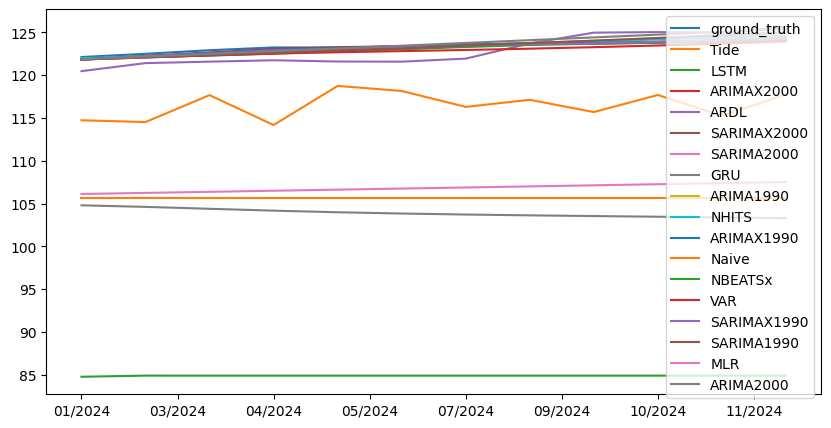

In [10]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 5))
ax = plt.axes()
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.locator_params(axis='x', nbins=10)

for model in predsDf.columns:
    plt.plot(predsDf.index, predsDf[model])

plt.legend(predsDf.columns)
plt.show()

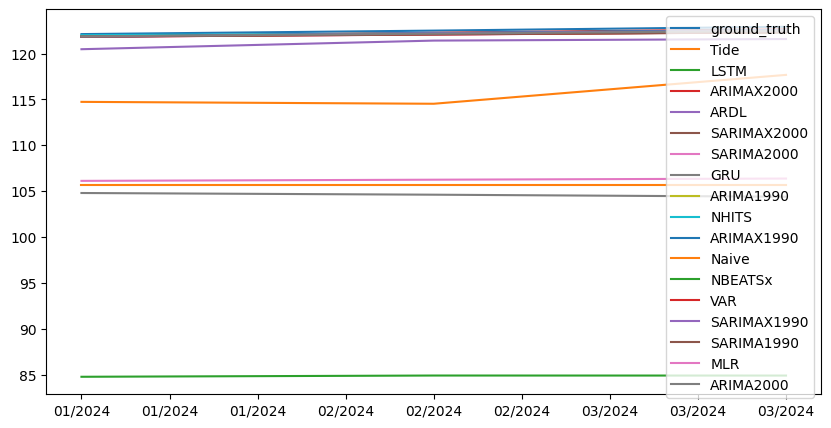

In [11]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 5))
ax = plt.axes()
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.locator_params(axis='x', nbins=10)

for model in predsDf.columns:
    plt.plot(predsDf.index[:int(len(predsDf)/4)], predsDf[model][:int(len(predsDf)/4)])

plt.legend(predsDf.columns)
plt.show()